In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [214]:
df = pd.read_csv('/Users/adeoyedipo/downloads/master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [215]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [216]:
df.rename(columns={'gdp_per_capita ($)':'gdp_per_capita',' gdp_for_year ($) ':'gdp_for_year'},inplace=True)

In [217]:
# to convert the gdp_for_year column from string to int
df['gdp_for_year'] = df['gdp_for_year'].apply(lambda x:int(re.sub(r'[^\w]','',x)))

In [218]:
# Creating the target variable/feature/attribute
y = df['suicides_no']

In [219]:
# spliting the data in training set and test set and the test set is 20% of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [220]:
X_train.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [221]:
# drop some columns due to lack or relevance or lack of information. droping suicides/100k pop cause it's 
# basically cheating,dropping country-year because i already have coumns for country and year, dropping HDI for year
# because too many missing values, HDI was introduced in the 1990s amd our data starts from 1987

for set_ in (X_train,X_test):
    set_.drop(columns=['country-year','HDI for year','suicides/100k pop','suicides_no'],inplace=True)

[808542, 2452141, 653118, 1123912, 1658443, 52264]
['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


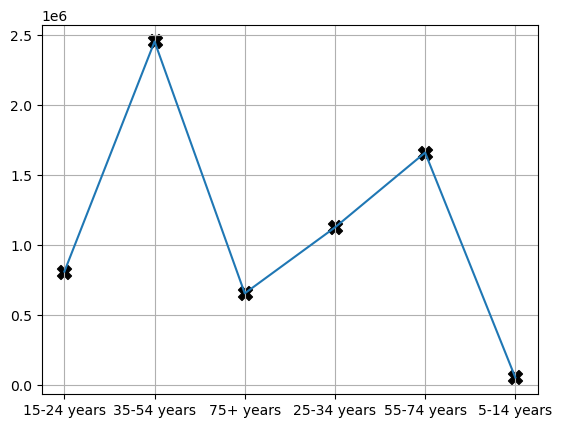

In [222]:
# just plotting total number of suicide per age group
# data insight i guess

d = [df[df['age']==i]['suicides_no'].sum() for i in df.age.unique()]
print(d)
print(df.age.unique())

# plt.scatter([1,2,3,4,5,6],d,marker='X',c='black',s=100)
plt.plot([1,2,3,4,5,6],d)
plt.scatter([1,2,3,4,5,6],d,marker='X',c='black',s=100)
plt.xticks(range(1,7),['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'])
plt.grid()
plt.show()

In [267]:
# i have checked if there are 
# now we have to performance data preprocessing, there are many categorical features in this dataset, and many 
# different scaled data features

# country,sex,age and generation are categorical
# year,population,gdp_for_year and gdp_per_capita

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
import numpy as np
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error

In [224]:
X_train.columns


Index(['country', 'year', 'sex', 'age', 'population', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [226]:
preprocessing = ColumnTransformer([('category',OneHotEncoder(handle_unknown='ignore'),
                                    ['country','sex','age','generation']),
                                  ('scaler',StandardScaler(),['year','population','gdp_for_year','gdp_per_capita'])],
                                 remainder='passthrough')


ColumnTransformer(remainder='passthrough',
                  transformers=[('category',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['country', 'sex', 'age', 'generation']),
                                ('scaler', StandardScaler(),
                                 ['year', 'population', 'gdp_for_year',
                                  'gdp_per_capita'])])

In [262]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

linear_pipeline = make_pipeline(preprocessing,LinearRegression())
forest_pipeline = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
tree_pipeline = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))

# Poly_pipeline = make_pipeline(preprocessing,PolynomialFeatures(degree=3),LinearRegression())

In [276]:
linear_pipeline.fit(X_train,y_train)
forest_pipeline.fit(X_train,y_train)
tree_pipeline.fit(X_train,y_train)
linear_pipeline.fit(X_train,y_train)

# Poly_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'sex', 'age',
                                                   'generation']),
                                                 ('scaler', StandardScaler(),
                                                  ['year', 'population',
                                                   'gdp_for_year',
                                                   'gdp_per_capita'])])),
                ('linearregression', LinearRegression())])

In [258]:
np.round(forest_pipeline.predict(X_train[:10]))

array([  78.,   38.,    8.,   15.,   11.,    0.,  195., 1215.,    3.,
         26.])

In [259]:
linear_pipeline.predict(X_train[:10])

array([  57.05338708,  266.50398572,  215.70939921, -682.91074137,
         31.61779481, -276.78969598,  443.03326216, 1198.5049136 ,
         43.1881086 ,   18.26924403])

In [260]:
tree_pipeline.predict(X_train[:10])

array([  77.,   40.,    8.,   16.,   11.,    0.,  196., 1263.,    3.,
         24.])

In [265]:
Poly_pipeline.predict(X_train[:10])

array([  71.51232797,   40.75080876,   12.62907517,  -21.5263896 ,
         17.76691543,    5.86330882,  162.62491095, 1202.57408422,
          3.53733062,   28.79835181])

In [314]:
mean_squared_error(forest_pipeline.predict(X_train),y_train,squared=False)

33.16625975889775

In [313]:
-cross_val_score(forest_pipeline,X_train,y_train,cv=10,scoring="neg_root_mean_squared_error")

array([ 65.56653421,  93.26608987, 148.37470115, 112.82773032,
        71.65988899,  99.5048689 ,  90.27450354,  78.52191819,
        93.40641552,  67.77165639])

In [315]:
mean_squared_error(linear_pipeline.predict(X_train),y_train,squared=False)

613.3854150046924

In [317]:
-cross_val_score(linear_pipeline,X_train,y_train,cv=10,scoring="neg_root_mean_squared_error")

array([508.59981178, 611.987462  , 769.72204101, 521.37960986,
       516.02350224, 676.45877492, 758.08217473, 611.23501205,
       598.73822532, 534.93546045])

In [321]:
-cross_val_score(tree_pipeline,X_train,y_train,cv=10,scoring="neg_root_mean_squared_error")

array([ 85.90278726,  94.59251284, 209.51287682, 164.24822886,
        77.31606582, 151.22610747, 101.07714709, 116.00490691,
       101.03011454,  81.26353025])

In [ ]:
# from my evaluation with k-fold cross-validation the random forest performanced the best
#let's fine tune the model to even make it performace better than before


In [344]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
final_pipeline = Pipeline([('preprocessin',preprocessing),
                           ('forest',RandomForestRegressor(n_jobs=-1,random_state=42))])
param_grid = {'forest__n_estimators':[200,300],
             'forest__max_depth':[35,40,45],
             'forest__min_samples_split':[3,4,5]
             }

grid_search = GridSearchCV(final_pipeline,param_grid=param_grid,scoring="neg_root_mean_squared_error",cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessin',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('category',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['country',
                                                                          'sex',
                                                                          'age',
                                                                          'generation']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'population',
                                                                          'gdp_for_year',
                                                                          'gdp_per_capita'])])),
                                       ('forest',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             param_grid={'forest__max_depth': [35, 40, 45],
                         'forest__min_samples_split': [3, 4, 5],
                         'forest__n_estimators': [200, 300]},
             scoring='neg_root_mean_squared_error')

In [353]:
-cross_val_score(grid_search.best_estimator_,X_train,y_train,scoring="neg_root_mean_squared_error",cv=10)

array([ 65.25337242,  93.57382991, 143.36930624, 117.99284102,
        69.12072679, 101.56787019,  90.48957517,  73.17648476,
        92.22990074,  66.29434544])

In [359]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessin',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'sex', 'age',
                                                   'generation']),
                                                 ('scaler', StandardScaler(),
                                                  ['year', 'population',
                                                   'gdp_for_year',
                                                   'gdp_per_capita'])])),
                ('forest',
                 RandomForestRegressor(max_depth=45, min_samples_split=3,
                                       n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [361]:
sorted(zip(grid_search.best_estimator_['forest'].feature_importances_,
grid_search.best_estimator_["preprocessin"].get_feature_names_out()),
reverse=True)

[(0.4286424718033992, 'scaler__population'),
 (0.11670296801333274, 'category__country_Russian Federation'),
 (0.08029251008921147, 'category__age_5-14 years'),
 (0.07828710457980619, 'scaler__gdp_per_capita'),
 (0.06797957320301716, 'category__sex_male'),
 (0.06797878318430722, 'category__sex_female'),
 (0.0355906746762592, 'scaler__gdp_for_year'),
 (0.034986137791162504, 'category__age_35-54 years'),
 (0.017424589668269434, 'category__country_Japan'),
 (0.011920658343409654, 'category__country_Ukraine'),
 (0.009848426013920776, 'scaler__year'),
 (0.005905163481903053, 'category__age_75+ years'),
 (0.005863373078991711, 'category__age_15-24 years'),
 (0.005315315089957966, 'category__country_Brazil'),
 (0.004434299216946754, 'category__country_Republic of Korea'),
 (0.004376931322929193, 'category__country_France'),
 (0.002729421652260876, 'category__country_Poland'),
 (0.002375211188736065, 'category__age_55-74 years'),
 (0.001963110510042669, 'category__generation_Boomers'),
 (0.001

In [383]:
# Time to evaluate on the test set
final_model = grid_search.best_estimator_
testset_prediction = final_model.predict(X_test)

test_set_rmse = mean_squared_error(y_test,testset_prediction,squared=False)
test_set_rmse

71.12040601806785

In [384]:
from scipy import stats

In [381]:
# we calculate the 95% confidence interval, it will give you the 95 % range where the
# generalization error(difference between the y_test and the prediction) fall under
squared_error = (y_test-testset_prediction)**2
confidence = 0.95
np.sqrt(stats.t.interval(confidence,len(squared_error) - 1,
                 loc=squared_error.mean(),scale=stats.sem(squared_error)))

array([56.4389108 , 83.25186876])

In [388]:
X_test

,country,year,sex,age,population,gdp_for_year,gdp_per_capita,generation
17437,Netherlands,2015,male,5-14 years,987750,757999453314,47206,Generation Z
23991,Sri Lanka,2001,female,75+ years,222745,15749753805,912,Silent
8337,El Salvador,2013,female,35-54 years,748153,21977401900,3885,Generation X
21661,Saint Vincent and Grenadines,1987,female,75+ years,1500,175580630,1908,G.I. Generation
6235,Costa Rica,2003,female,75+ years,54020,17195867540,4583,Silent
...,...,...,...,...,...,...,...,...
22139,Serbia,2012,female,75+ years,338375,40742313861,5933,Silent
27817,Uzbekistan,2014,male,5-14 years,2762158,63067077179,2309,Generation Z
20399,Republic of Korea,1999,male,55-74 years,2634700,485248229337,11074,Silent
25954,Turkmenistan,2006,female,35-54 years,553688,10277598152,2397,Boomers
